In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import openpyxl
import xlrd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text

In [52]:

def get_matches_table(url: str) -> pd.DataFrame:
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Garante erro explícito se o request falhar

    soup = BeautifulSoup(response.content, "html.parser")

    # Encontra a tabela pela classe ou outro seletor
    table_container = soup.find("div", class_="table-container redesign")
    table = table_container.find("table", class_="matches")

    # Transforma a tabela HTML em string e depois em DataFrame
    df = pd.read_html(str(table))[0]

    return df

url = "https://br.soccerway.com/teams/brazil/fortaleza-esporte-clube/327/matches/"
df = get_matches_table(url)
#print(df.head())

In [53]:
urls = [
    "https://br.soccerway.com/teams/brazil/clube-atletico-mineiro/317/matches/",
    "https://br.soccerway.com/teams/brazil/esporte-clube-bahia/341/matches/",
    "https://br.soccerway.com/teams/brazil/botafogo-de-futebol-e-regatas/323/matches/",
    "https://br.soccerway.com/teams/brazil/ceara-sporting-club/333/matches/",
    "https://br.soccerway.com/teams/brazil/sport-club-corinthians-paulista/320/matches/",
    "https://br.soccerway.com/teams/brazil/cruzeiro-esporte-clube-belo-horizonte/304/matches/",
    "https://br.soccerway.com/teams/brazil/clube-de-regatas-de-flamengo/318/matches/",
    "https://br.soccerway.com/teams/brazil/fluminense-football-club/312/matches/",
    "https://br.soccerway.com/teams/brazil/fortaleza-esporte-clube/327/matches/",
    "https://br.soccerway.com/teams/brazil/gremio-foot-ball-porto-alegrense/313/matches/",
    "https://br.soccerway.com/teams/brazil/sport-club-internacional/308/matches/",
    "https://br.soccerway.com/teams/brazil/esporte-clube-juventude/314/matches/",
    "https://br.soccerway.com/teams/brazil/mirassol-futebol-clube/10164/matches/",
    "https://br.soccerway.com/teams/brazil/sociedade-esportiva-palmeiras/310/matches/",
    "https://br.soccerway.com/teams/brazil/clube-atletico-bragantino/2827/matches/",
    "https://br.soccerway.com/teams/brazil/santos-futebol-clube-sao-paulo/319/matches/",
    "https://br.soccerway.com/teams/brazil/sport-club-do-recife/338/matches/",
    "https://br.soccerway.com/teams/brazil/sao-paulo-futebol-clube/302/matches/",
    "https://br.soccerway.com/teams/brazil/cr-vasco-da-gama/321/matches/",
    "https://br.soccerway.com/teams/brazil/esporte-clube-vitoria/306/matches/",
]
#Achei melhor fazer  com for porque o map estava juntando todas as tabelas em uma só, com o for cada item da lista é um df diferente
lista_de_times = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20"]
for i in range(len(lista_de_times)):
    lista_de_times[i] = get_matches_table(urls[i])
#lista_de_times = list(map(get_matches_table, urls))
lista_de_times

[        Data Competição           Outcome    Home team           Score/Time  \
 0   24/11/24        BSA         São Paulo        2 - 2          Atlético-MG   
 1   27/11/24        BSA       Atlético-MG        2 - 3            Juventude   
 2   30/11/24        CLD       Atlético-MG        1 - 3             Botafogo   
 3   04/12/24        BSA     Vasco da Gama        2 - 0          Atlético-MG   
 4   08/12/24        BSA       Atlético-MG        1 - 0         Athletico PR   
 5   18/01/25        ADC       Atlético-MG        0 - 0             Cruzeiro   
 6   19/01/25        CAM           Aymorés        0 - 0          Atlético-MG   
 7   22/01/25        CAM       Atlético-MG        1 - 1         Democrata-GV   
 8   25/01/25        ADC      Orlando City  P  0 - 0  P          Atlético-MG   
 9   26/01/25        CAM      Pouso Alegre        0 - 0          Atlético-MG   
 10  30/01/25        CAM       Atlético-MG        1 - 1           América-MG   
 11  01/02/25        CAM        Villa No

In [54]:
for i in range(len(lista_de_times)):#percorre todos os df da lista

    lista_de_times[i]['Data'] = pd.to_datetime(lista_de_times[i]['Data'])# muda a coluna data de string para date

In [55]:
for i in range(len(lista_de_times)):#percorre todos os df da lista

    lista_de_times[i]['Data'] >= dt.datetime(2025,1,1) # retorna True or False
    lista_de_times[i] = lista_de_times[i][lista_de_times[i]['Data'] >= dt.datetime(2025,1,1)] # salva e  filtra apenas os valores 
    #verdadeiros no DF

In [56]:
for i in range(len(lista_de_times)):#percorre todos os df da lista

    lista_de_times[i][lista_de_times[i]['Competição'] != "ADC"]
    lista_de_times[i] = lista_de_times[i][lista_de_times[i]['Competição'] != "ADC"]

In [57]:
# apagar colunas away tem e unnamed
for i in range(len(lista_de_times)):#percorre todos os df da lista

    lista_de_times[i].drop(lista_de_times[i].columns[[5,6]],axis = 1, inplace = True)

#vai de tabela em tabela apagando as duas ultimas colunas
#.drop apaga as colunas, lista_de_times[0].columns[[5,6]] são as colunas que serao dropadas
#axis 1 sinaliza que est´apagando colunas, inplace = true faz nao precisar criar outro df

In [58]:
for i in range(len(lista_de_times)):    
    lista_de_times[i]['Time Avaliado'] = 1 #cria a coluna time avaliado e coloca um valor 1 temporario nela
lista_de_times[3]

,Data,Competição,Outcome,Home team,Score/Time,Time Avaliado
5,2025-01-18,CAC,Ceará,2 - 1,Tirol,1
6,2025-01-23,CDN,Náutico,1 - 0,Ceará,1
7,2025-01-26,CAC,Ferroviário,1 - 2,Ceará,1
8,2025-01-30,CAC,Ceará,1 - 0,Iguatu,1
9,2025-02-02,CAC,Ceará,5 - 0,Barbalha,1
10,2025-06-02,CDN,Ceará,1 - 0,CSA,1
11,2025-08-02,CAC,Fortaleza,1 - 2,Ceará,1
12,2025-12-02,CDN,Ceará,1 - 1,Confiança-SE,1
13,2025-02-20,CDB,Sergipe,0 - 2,Ceará,1
14,2025-02-03,CAC,Maracanã,0 - 3,Ceará,1


In [59]:
for j in range(len(lista_de_times)):#percorre a lista de times com os df de cada time

    for i in range(len(lista_de_times[j]['Outcome'])):#percorre cada linha da coluna outcome dos dfs dos times.
        lista_de_times[j]['Time Avaliado'].iloc[i] = lista_de_times[j]['Outcome'].mode()[0] #troca o 1 temporario da coluna time avaliado parao time que mais aparece na coluna outcome


c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [60]:
for j in range(len(lista_de_times)):#percorre a lista de times com os df de cada time
    for i in range(len(lista_de_times[j]['Home team'])):#percorre cada linha da coluna home team dos dfs dos times.
        if lista_de_times[j].iloc[i,3][0] == "P": #lista de times[x]-> primeira tabela da lista,  iloc[i,3] -> item da linha i coluna 3, [0] primeiro caractere do item
            lista_de_times[j].iloc[i,3] = lista_de_times[j].iloc[i,3][3:-3] #retira todos os P que indicam cobrença de penalti
lista_de_times[9]

,Data,Competição,Outcome,Home team,Score/Time,Time Avaliado
6,2025-01-23,CAG,Brasil-RS,0 - 0,Grêmio,Grêmio
7,2025-01-27,CAG,Grêmio,4 - 0,Caxias do Sul,Grêmio
8,2025-01-30,CAG,Monsoon,0 - 3,Grêmio,Grêmio
9,2025-01-02,CAG,Grêmio,5 - 0,São Luiz,Grêmio
10,2025-06-02,CAG,Juventude,2 - 0,Grêmio,Grêmio
11,2025-09-02,CAG,Grêmio,1 - 1,Internacional,Grêmio
12,2025-12-02,CAG,Grêmio,5 - 0,Pelotas,Grêmio
13,2025-02-15,CAG,Ypiranga-RS,0 - 1,Grêmio,Grêmio
14,2025-02-19,CDB,São Raimundo-RR,1 - 1,Grêmio,Grêmio
15,2025-02-23,CAG,Grêmio,2 - 1,Juventude,Grêmio


In [61]:
for i in range(len(lista_de_times)):    
    lista_de_times[i]['Gols pro'] = 1 #cria a coluna gols pro e coloca um valor 1 temporario nela
lista_de_times[0]

,Data,Competição,Outcome,Home team,Score/Time,Time Avaliado,Gols pro
6,2025-01-19,CAM,Aymorés,0 - 0,Atlético-MG,Atlético-MG,1
7,2025-01-22,CAM,Atlético-MG,1 - 1,Democrata-GV,Atlético-MG,1
9,2025-01-26,CAM,Pouso Alegre,0 - 0,Atlético-MG,Atlético-MG,1
10,2025-01-30,CAM,Atlético-MG,1 - 1,América-MG,Atlético-MG,1
11,2025-01-02,CAM,Villa Nova,0 - 1,Atlético-MG,Atlético-MG,1
12,2025-05-02,CAM,Atlético-MG,1 - 0,Athletic Club MG,Atlético-MG,1
13,2025-09-02,CAM,Cruzeiro,0 - 2,Atlético-MG,Atlético-MG,1
14,2025-12-02,CAM,Atlético-MG,3 - 0,Itabirito,Atlético-MG,1
15,2025-02-15,CAM,Atlético-MG,2 - 0,Tombense-MG,Atlético-MG,1
16,2025-02-18,CDB,Tocantinópolis,0 - 2,Atlético-MG,Atlético-MG,1


In [62]:
for j in range(len(lista_de_times)):#percorre a lista de times com os df de cada time
    lista_de_times[j].reset_index(drop = True, inplace = True) # reseta o index de volta oa normal 0 1 2 3, pq o drop linhas da proxima celula  só funciona com index 
    #drop = true para nao criar uma coluna com o index antigo
    #inplace  =  true faz n precisa criar outro df
lista_de_times[0]

,Data,Competição,Outcome,Home team,Score/Time,Time Avaliado,Gols pro
0,2025-01-19,CAM,Aymorés,0 - 0,Atlético-MG,Atlético-MG,1
1,2025-01-22,CAM,Atlético-MG,1 - 1,Democrata-GV,Atlético-MG,1
2,2025-01-26,CAM,Pouso Alegre,0 - 0,Atlético-MG,Atlético-MG,1
3,2025-01-30,CAM,Atlético-MG,1 - 1,América-MG,Atlético-MG,1
4,2025-01-02,CAM,Villa Nova,0 - 1,Atlético-MG,Atlético-MG,1
5,2025-05-02,CAM,Atlético-MG,1 - 0,Athletic Club MG,Atlético-MG,1
6,2025-09-02,CAM,Cruzeiro,0 - 2,Atlético-MG,Atlético-MG,1
7,2025-12-02,CAM,Atlético-MG,3 - 0,Itabirito,Atlético-MG,1
8,2025-02-15,CAM,Atlético-MG,2 - 0,Tombense-MG,Atlético-MG,1
9,2025-02-18,CDB,Tocantinópolis,0 - 2,Atlético-MG,Atlético-MG,1


In [63]:
for j in range(len(lista_de_times)):  # percorre a lista de times com os df de cada time
    rows_to_drop = []  # lista para armazenar os índices das linhas a serem dropadas

    for i in range(len(lista_de_times[j]['Home team'])):  # percorre cada linha da coluna outcome dos dfs dos times.
        if (len(lista_de_times[j].iloc[i, 3]) > 6) or (len(lista_de_times[j].iloc[i, 3]) < 5):  # verifica o comprimento
            rows_to_drop.append(i)  # adiciona o índice da linha à lista

    # dropa as linhas após a iteração
    lista_de_times[j].drop(rows_to_drop, inplace=True)
lista_de_times[9]

,Data,Competição,Outcome,Home team,Score/Time,Time Avaliado,Gols pro
0,2025-01-23,CAG,Brasil-RS,0 - 0,Grêmio,Grêmio,1
1,2025-01-27,CAG,Grêmio,4 - 0,Caxias do Sul,Grêmio,1
2,2025-01-30,CAG,Monsoon,0 - 3,Grêmio,Grêmio,1
3,2025-01-02,CAG,Grêmio,5 - 0,São Luiz,Grêmio,1
4,2025-06-02,CAG,Juventude,2 - 0,Grêmio,Grêmio,1
5,2025-09-02,CAG,Grêmio,1 - 1,Internacional,Grêmio,1
6,2025-12-02,CAG,Grêmio,5 - 0,Pelotas,Grêmio,1
7,2025-02-15,CAG,Ypiranga-RS,0 - 1,Grêmio,Grêmio,1
8,2025-02-19,CDB,São Raimundo-RR,1 - 1,Grêmio,Grêmio,1
9,2025-02-23,CAG,Grêmio,2 - 1,Juventude,Grêmio,1


In [64]:
for j in range(len(lista_de_times)):#percorre a lista de times com os df de cada time
    for i in range(len(lista_de_times[j]['Outcome'])):#percorre cada linha da coluna outcome dos dfs dos times.
        if lista_de_times[j].iloc[i,2] == lista_de_times[j].iloc[i,5]:  # se outcome = time avaliado, pega o gol do lado esquerdo e bota em gols pro
            lista_de_times[j].iloc[i,6] = lista_de_times[j].iloc[i,3][0]

        if lista_de_times[j].iloc[i,2] != lista_de_times[j].iloc[i,5]: # se outcome != time avaliado, pega o gol da direita e bota em gols pro 
            lista_de_times[j].iloc[i,6] = lista_de_times[j].iloc[i,3][-1]
        

In [65]:
for j in range(len(lista_de_times)):    
    lista_de_times[j]['Gols contra'] = 1 #cria a coluna gols pro e coloca um valor 1 temporario nela
lista_de_times[0]

,Data,Competição,Outcome,Home team,Score/Time,Time Avaliado,Gols pro,Gols contra
0,2025-01-19,CAM,Aymorés,0 - 0,Atlético-MG,Atlético-MG,0,1
1,2025-01-22,CAM,Atlético-MG,1 - 1,Democrata-GV,Atlético-MG,1,1
2,2025-01-26,CAM,Pouso Alegre,0 - 0,Atlético-MG,Atlético-MG,0,1
3,2025-01-30,CAM,Atlético-MG,1 - 1,América-MG,Atlético-MG,1,1
4,2025-01-02,CAM,Villa Nova,0 - 1,Atlético-MG,Atlético-MG,1,1
5,2025-05-02,CAM,Atlético-MG,1 - 0,Athletic Club MG,Atlético-MG,1,1
6,2025-09-02,CAM,Cruzeiro,0 - 2,Atlético-MG,Atlético-MG,2,1
7,2025-12-02,CAM,Atlético-MG,3 - 0,Itabirito,Atlético-MG,3,1
8,2025-02-15,CAM,Atlético-MG,2 - 0,Tombense-MG,Atlético-MG,2,1
9,2025-02-18,CDB,Tocantinópolis,0 - 2,Atlético-MG,Atlético-MG,2,1


In [66]:
for j in range(len(lista_de_times)):#percorre a lista de times com os df de cada time
    for i in range(len(lista_de_times[j]['Outcome'])):#percorre cada linha da coluna outcome dos dfs dos times.
        if lista_de_times[j].iloc[i,2] == lista_de_times[j].iloc[i,5]:  # se outcome = time avaliado, pega o gol do lado direito e bota em gols contra
            lista_de_times[j].iloc[i,7] = lista_de_times[j].iloc[i,3][-1]

        if lista_de_times[j].iloc[i,2] != lista_de_times[j].iloc[i,5]: # se outcome != time avaliado, pega o gol da esquerda e bota em gols contra 
            lista_de_times[j].iloc[i,7] = lista_de_times[j].iloc[i,3][0]
lista_de_times[9]

,Data,Competição,Outcome,Home team,Score/Time,Time Avaliado,Gols pro,Gols contra
0,2025-01-23,CAG,Brasil-RS,0 - 0,Grêmio,Grêmio,0,0
1,2025-01-27,CAG,Grêmio,4 - 0,Caxias do Sul,Grêmio,4,0
2,2025-01-30,CAG,Monsoon,0 - 3,Grêmio,Grêmio,3,0
3,2025-01-02,CAG,Grêmio,5 - 0,São Luiz,Grêmio,5,0
4,2025-06-02,CAG,Juventude,2 - 0,Grêmio,Grêmio,0,2
5,2025-09-02,CAG,Grêmio,1 - 1,Internacional,Grêmio,1,1
6,2025-12-02,CAG,Grêmio,5 - 0,Pelotas,Grêmio,5,0
7,2025-02-15,CAG,Ypiranga-RS,0 - 1,Grêmio,Grêmio,1,0
8,2025-02-19,CDB,São Raimundo-RR,1 - 1,Grêmio,Grêmio,1,1
9,2025-02-23,CAG,Grêmio,2 - 1,Juventude,Grêmio,2,1


In [67]:
for j in range(len(lista_de_times)):    
    lista_de_times[j]['Time desafiante'] = 1 #cria a coluna gols pro e coloca um valor 1 temporario nela
lista_de_times[9]

,Data,Competição,Outcome,Home team,Score/Time,Time Avaliado,Gols pro,Gols contra,Time desafiante
0,2025-01-23,CAG,Brasil-RS,0 - 0,Grêmio,Grêmio,0,0,1
1,2025-01-27,CAG,Grêmio,4 - 0,Caxias do Sul,Grêmio,4,0,1
2,2025-01-30,CAG,Monsoon,0 - 3,Grêmio,Grêmio,3,0,1
3,2025-01-02,CAG,Grêmio,5 - 0,São Luiz,Grêmio,5,0,1
4,2025-06-02,CAG,Juventude,2 - 0,Grêmio,Grêmio,0,2,1
5,2025-09-02,CAG,Grêmio,1 - 1,Internacional,Grêmio,1,1,1
6,2025-12-02,CAG,Grêmio,5 - 0,Pelotas,Grêmio,5,0,1
7,2025-02-15,CAG,Ypiranga-RS,0 - 1,Grêmio,Grêmio,1,0,1
8,2025-02-19,CDB,São Raimundo-RR,1 - 1,Grêmio,Grêmio,1,1,1
9,2025-02-23,CAG,Grêmio,2 - 1,Juventude,Grêmio,2,1,1


In [68]:
for j in range(len(lista_de_times)):#percorre a lista de times com os df de cada time

    for i in range(len(lista_de_times[j]['Outcome'])):#percorre cada linha da coluna outcome dos dfs dos times.
        if lista_de_times[j].iloc[i,2] == lista_de_times[j].iloc[1,5]:
            lista_de_times[j].iloc[i,8] = lista_de_times[j].iloc[i,4]

        if lista_de_times[j].iloc[i,2] != lista_de_times[j].iloc[1,5]:
            lista_de_times[j].iloc[i,8] = lista_de_times[j].iloc[i,2]
lista_de_times[9]

        

,Data,Competição,Outcome,Home team,Score/Time,Time Avaliado,Gols pro,Gols contra,Time desafiante
0,2025-01-23,CAG,Brasil-RS,0 - 0,Grêmio,Grêmio,0,0,Brasil-RS
1,2025-01-27,CAG,Grêmio,4 - 0,Caxias do Sul,Grêmio,4,0,Caxias do Sul
2,2025-01-30,CAG,Monsoon,0 - 3,Grêmio,Grêmio,3,0,Monsoon
3,2025-01-02,CAG,Grêmio,5 - 0,São Luiz,Grêmio,5,0,São Luiz
4,2025-06-02,CAG,Juventude,2 - 0,Grêmio,Grêmio,0,2,Juventude
5,2025-09-02,CAG,Grêmio,1 - 1,Internacional,Grêmio,1,1,Internacional
6,2025-12-02,CAG,Grêmio,5 - 0,Pelotas,Grêmio,5,0,Pelotas
7,2025-02-15,CAG,Ypiranga-RS,0 - 1,Grêmio,Grêmio,1,0,Ypiranga-RS
8,2025-02-19,CDB,São Raimundo-RR,1 - 1,Grêmio,Grêmio,1,1,São Raimundo-RR
9,2025-02-23,CAG,Grêmio,2 - 1,Juventude,Grêmio,2,1,Juventude


In [69]:
for j in range(len(lista_de_times)):    
    lista_de_times[j]['Vitoria'] = 1 #cria a coluna gols pro e coloca um valor 1 temporario nela
lista_de_times[1]

,Data,Competição,Outcome,Home team,Score/Time,Time Avaliado,Gols pro,Gols contra,Time desafiante,Vitoria
0,2025-01-19,CAB,Jacobina,1 - 1,Bahia,Bahia,1,1,Jacobina,1
1,2025-01-24,CDN,Bahia,4 - 0,Sampaio Corrêa-MA,Bahia,4,0,Sampaio Corrêa-MA,1
2,2025-01-26,CAB,Bahia,2 - 0,Porto BA,Bahia,2,0,Porto BA,1
3,2025-01-29,CAB,Jequié,1 - 3,Bahia,Bahia,3,1,Jequié,1
4,2025-01-02,CAB,Bahia,0 - 0,Vitória,Bahia,0,0,Vitória,1
5,2025-05-02,CDN,Juazeirense,0 - 0,Bahia,Bahia,0,0,Juazeirense,1
6,2025-09-02,CAB,Bahia,6 - 0,Colo Colo,Bahia,6,0,Colo Colo,1
7,2025-12-02,CDN,Bahia,5 - 1,América-RN,Bahia,5,1,América-RN,1
8,2025-02-15,CAB,Barcelona BA,0 - 1,Bahia,Bahia,1,0,Barcelona BA,1
9,2025-02-19,CLD,The Strongest,1 - 1,Bahia,Bahia,1,1,The Strongest,1


In [70]:
for j in range(len(lista_de_times)):#percorre a lista de times com os df de cada time

    for i in range(len(lista_de_times[j]['Vitoria'])):
        if lista_de_times[j].iloc[i,6] > lista_de_times[j].iloc[i,7]:
            lista_de_times[j].iloc[i,9] = "Sim"
        else:
            lista_de_times[j].iloc[i,9] = "Nao"
lista_de_times[1]

,Data,Competição,Outcome,Home team,Score/Time,Time Avaliado,Gols pro,Gols contra,Time desafiante,Vitoria
0,2025-01-19,CAB,Jacobina,1 - 1,Bahia,Bahia,1,1,Jacobina,Nao
1,2025-01-24,CDN,Bahia,4 - 0,Sampaio Corrêa-MA,Bahia,4,0,Sampaio Corrêa-MA,Sim
2,2025-01-26,CAB,Bahia,2 - 0,Porto BA,Bahia,2,0,Porto BA,Sim
3,2025-01-29,CAB,Jequié,1 - 3,Bahia,Bahia,3,1,Jequié,Sim
4,2025-01-02,CAB,Bahia,0 - 0,Vitória,Bahia,0,0,Vitória,Nao
5,2025-05-02,CDN,Juazeirense,0 - 0,Bahia,Bahia,0,0,Juazeirense,Nao
6,2025-09-02,CAB,Bahia,6 - 0,Colo Colo,Bahia,6,0,Colo Colo,Sim
7,2025-12-02,CDN,Bahia,5 - 1,América-RN,Bahia,5,1,América-RN,Sim
8,2025-02-15,CAB,Barcelona BA,0 - 1,Bahia,Bahia,1,0,Barcelona BA,Sim
9,2025-02-19,CLD,The Strongest,1 - 1,Bahia,Bahia,1,1,The Strongest,Nao


In [71]:
for j in range(len(lista_de_times)):#percorre todos os df da lista

    lista_de_times[j][lista_de_times[j]['Vitoria'] == "Sim"]
    lista_de_times[j] = lista_de_times[j][lista_de_times[j]['Vitoria'] == "Sim"]

In [72]:
nomes_dos_times = [
    "Clube Atlético Mineiro",
    "Esporte Clube Bahia",
    "Botafogo de Futebol e Regatas",
    "Ceará Sporting Club",
    "Sport Club Corinthians Paulista",
    "Cruzeiro Esporte Clube Belo Horizonte",
    "Clube de Regatas do Flamengo",
    "Fluminense Football Club",
    "Fortaleza Esporte Clube",
    "Grêmio Foot-Ball Porto Alegrense",
    "Sport Club Internacional",
    "Esporte Clube Juventude",
    "Mirassol Futebol Clube",
    "Sociedade Esportiva Palmeiras",
    "Clube Atlético Bragantino",
    "Santos Futebol Clube São Paulo",
    "Sport Club do Recife",
    "São Paulo Futebol Clube",
    "CR Vasco da Gama",
    "Esporte Clube Vitória"
]
df_de_vitorias = pd.DataFrame(columns = ['Times','Qty vitorias', 'Times vencidos'])
df_de_vitorias['Times'] = nomes_dos_times


In [73]:

lista_Qty_vitorias = []

for j in range(20):
    unicos = np.unique(lista_de_times[j]['Time desafiante'])
    qty_unicos = len(unicos)
    lista_Qty_vitorias.append(qty_unicos)
    
df_de_vitorias['Qty vitorias'] = lista_Qty_vitorias


In [ ]:

lista_times_vencidos = []

for j in range(20):

    lista_times_vencidos.append(np.unique(lista_de_times[j]['Time desafiante']))

df_de_vitorias['Times vencidos'] = lista_times_vencidos

In [84]:
df_de_vitorias.sort_values(by=['Qty vitorias'], ascending=True, ignore_index=True, inplace=True)

In [ ]:
df = df_de_vitorias
df.sort_values(by=['Qty vitorias'], ascending=False, ignore_index=True, inplace= True)

for i in range(len(df['Times vencidos'])):
    print(len(' '.join(df_de_vitorias.iloc[i,2])))


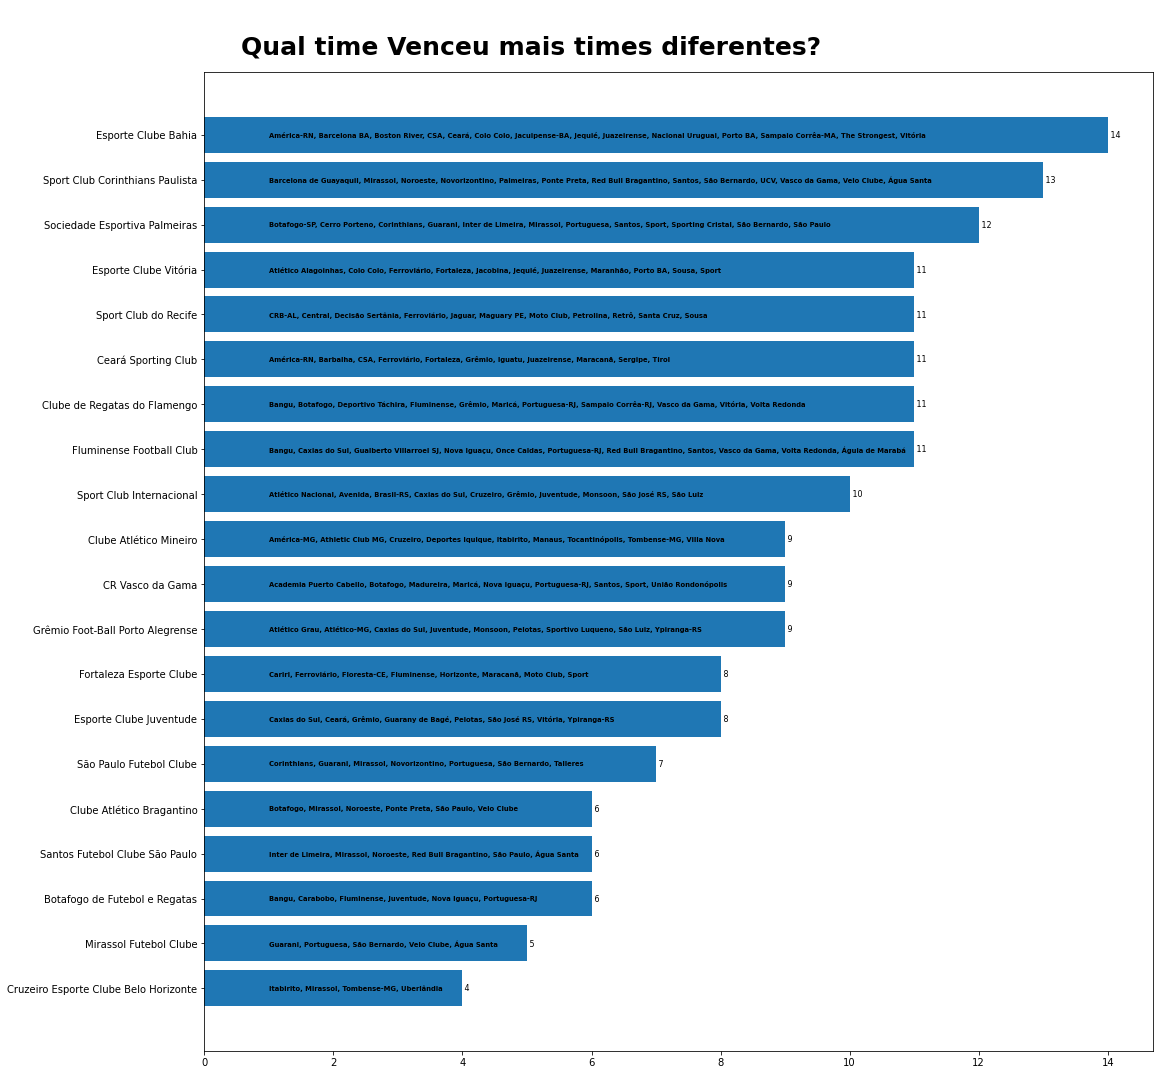

In [128]:
#inicia a figura
fig, ax = plt.subplots(figsize = (17,18))

#cores
background_color = 'White'
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

#cria o grafico
ax.barh(df_de_vitorias['Times'], df_de_vitorias['Qty vitorias'])
for i, (qty_vitorias, times_vencidos) in enumerate(zip(df_de_vitorias['Qty vitorias'],
                                               df_de_vitorias['Times vencidos'])):
    #if times.startswith("Sport Club Corin"):
        #times = "Corinthians"
    #elif times.startswith("Sociedade"):
        #times = "Palmeiras"
    ax.text(x=1,
            y=i, 
            s=str(", ".join(times_vencidos)),
            ha='left', 
            va='center', 
            fontsize=6.8,
            weight='semibold',
            wrap=False)
    ax.text(x=qty_vitorias, 
            y=i, 
            s=f' {int(qty_vitorias)}',
            ha='left', 
            va='center', 
            fontsize=8)

# add a title
text = """
Qual time Venceu mais times diferentes?
"""
fig.text(x=0.155, y=0.9,
    s=text,
    fontsize=25, ha='left', va='center',
    weight='bold', color='Black'
)   

#
plt.show()

In [77]:
#lista de times na ordem dos links para nomear as planilhas
nomes_dos_times = [
    "Clube Atlético Mineiro",
    "Esporte Clube Bahia",
    "Botafogo de Futebol e Regatas",
    "Ceará Sporting Club",
    "Sport Club Corinthians Paulista",
    "Cruzeiro Esporte Clube Belo Horizonte",
    "Clube de Regatas do Flamengo",
    "Fluminense Football Club",
    "Fortaleza Esporte Clube",
    "Grêmio Foot-Ball Porto Alegrense",
    "Sport Club Internacional",
    "Esporte Clube Juventude",
    "Mirassol Futebol Clube",
    "Sociedade Esportiva Palmeiras",
    "Clube Atlético Bragantino",
    "Santos Futebol Clube São Paulo",
    "Sport Club do Recife",
    "São Paulo Futebol Clube",
    "CR Vasco da Gama",
    "Esporte Clube Vitória"
]

#Passando os dados para um formato excel de 1 time por planilha
'''
with pd.ExcelWriter("tabela_times_dados_brutos.xlsx") as writer:
    for i in range(len(lista_de_times)):
        lista_de_times[i].to_excel(writer, sheet_name=nomes_dos_times[i])'''

'\nwith pd.ExcelWriter("tabela_times_dados_brutos.xlsx") as writer:\n    for i in range(len(lista_de_times)):\n        lista_de_times[i].to_excel(writer, sheet_name=nomes_dos_times[i])'